# A Multi-layer Perceptron from Scratch 

### Objectives: 

- Build a Multi-layer perceptron from scratch 
- Download and read the MNIST data set 
- build a neural network to predict the numbers in the MNIST dataset
- plot cost and create the best network possible 

In [1]:
# libraries

from mlp import MLP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
from IPython import display

sns.set_style('dark')

In [2]:
# data 

training_data = pd.read_csv('data/mnist_train.csv',header=0,sep=',')
training_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X_train = training_data[training_data.columns[training_data.columns != 'label']]
display.display(X_train.head())
y_train = training_data['label']
display.display(y_train.head())

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [4]:
print('X_Rows: {}, X_columns: {}'.format(X_train.shape[0],X_train.shape[1]))
print('y_Rows: {}'.format(y_train.shape))

X_Rows: 60000, X_columns: 784
y_Rows: (60000,)


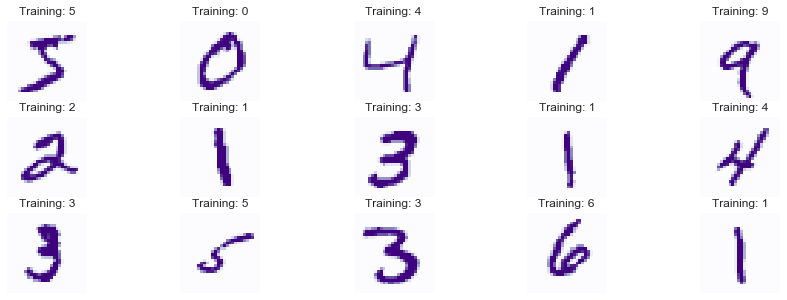

In [8]:
# sample the first 15 rows
plt.figure(figsize=(15,5))
for idx, (image,label) in enumerate(zip(X_train.iloc[0:15,0:784].values,y_train.iloc[0:15].values)):
    plt.subplot(3,5,idx+1)
    plt.imshow(image.reshape(28,28),cmap='Purples')
    plt.title('Training: {}'.format(label,fontsize=20))
    plt.xticks([])
    plt.yticks([])
    

plt.show()

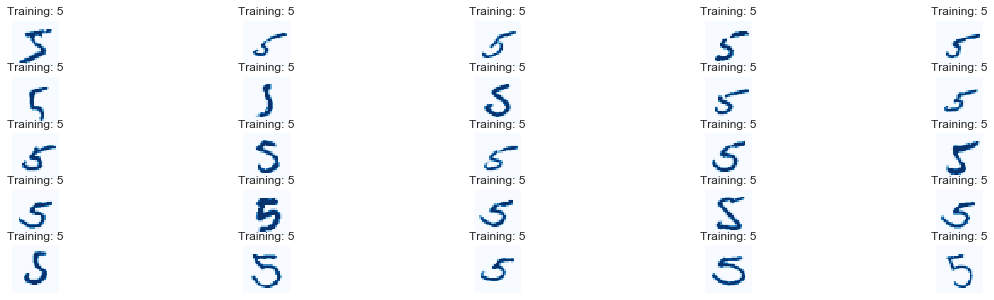

In [9]:
# examples of only number 5's, 25 samples 
y_train_5s = y_train[y_train == 5][0:25]
x_5_index  = y_train[y_train == 5][0:25].index
x_5s = X_train.loc[x_5_index]
plt.figure(figsize=(20,5))
for idx, (image,label) in enumerate(zip(x_5s.values,y_train_5s.values)):
    plt.subplot(5,5,idx+1)
    plt.imshow(image.reshape(28,28),cmap='Blues')
    plt.title('Training: {}'.format(label,fontsize=20))
    plt.xticks([])
    plt.yticks([])
    

plt.show()

In [10]:
nn = MLP(n_output=10,n_features=X_train.shape[1],hidden=50,l2=0.0,l1=0.1,alpha=.001,epochs=1000,eta=.001,
         decrease_const=0.00001,shuffle=True,minibatches=50,random_state=1)

In [11]:
y_train.shape

(60000,)

Epoch 1/1000C:\Users\mjcastaneda4\Documents\Data_Science\datacamp\dscourse\ml_scripts\mlp.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + (np.exp(-z)))
Epoch 1000/1000

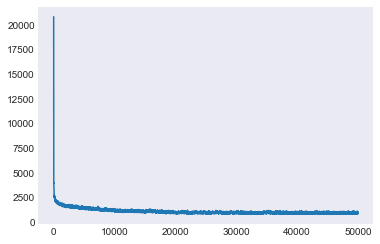

In [12]:
nn.fit(X_train,y_train,print_progress=True)
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.show()

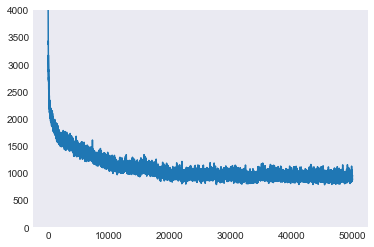

In [13]:
# zoom in 
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0,4000])
plt.show()

In [15]:
try:
    y_train_pred = nn.predict(X_train)
except:
    raise RuntimeError('Not possible')


C:\Users\mjcastaneda4\Documents\Data_Science\datacamp\dscourse\ml_scripts\mlp.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + (np.exp(-z)))


In [16]:
acc = np.sum(y_train_pred == y_train) / X_train.shape[0]
print("Training Accuracy = {:.2f}".format(acc * 100))

Training Accuracy = 93.25


In [17]:
test_data = pd.read_csv('data/mnist_test.csv',header=0,sep=',')
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X_test = test_data[test_data.columns[test_data.columns != 'label']]
display.display(X_test.head())
y_test = test_data['label']
display.display(y_test.head())


,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [19]:
print('Testing Accuracy {:.2f}'.format((np.sum(y_test == nn.predict(X_test), axis=0)/X_test.shape[0]) * 100))

Testing Accuracy 93.08


C:\Users\mjcastaneda4\Documents\Data_Science\datacamp\dscourse\ml_scripts\mlp.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + (np.exp(-z)))


In [20]:
display.display(X_test[0:1])
display.display(y_test[0])

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7

In [21]:
print(nn.predict(X_test[0:1]))

[7]


C:\Users\mjcastaneda4\Documents\Data_Science\datacamp\dscourse\ml_scripts\mlp.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + (np.exp(-z)))


In [22]:
display.display(X_test[1:2])
y_test[1]

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2

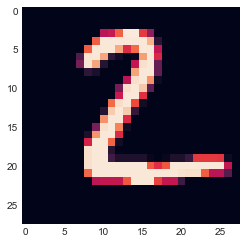

In [23]:
plt.imshow(X_test.iloc[1].values.reshape(28,28))
plt.show()

In [24]:
print(nn.predict(X_test[3:4]))

[0]


C:\Users\mjcastaneda4\Documents\Data_Science\datacamp\dscourse\ml_scripts\mlp.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + (np.exp(-z)))


C:\Users\mjcastaneda4\Documents\Data_Science\datacamp\dscourse\ml_scripts\mlp.py:64: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + (np.exp(-z)))


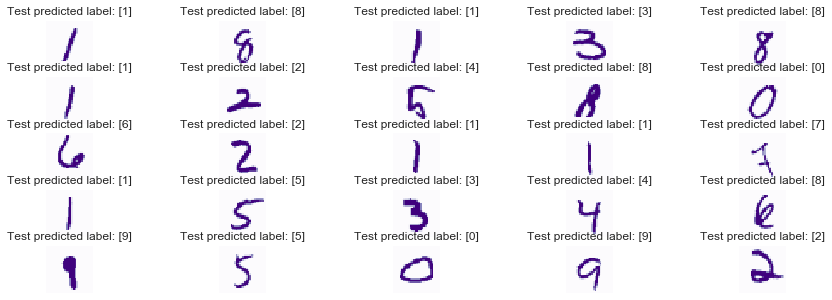

In [25]:
plt.figure(figsize=(15,5))
for idx, image in enumerate(X_test[1025:1050].values):
    plt.subplot(5,5,idx+1)
    plt.imshow(image.reshape(28,28),cmap='Purples')
    plt.title('Test predicted label: {}'.format((nn.predict(image.reshape(1,784)))))
    plt.xticks([])
    plt.yticks([])